# Setup

In [1]:
%matplotlib inline
import timeit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("NumPy   %s" % np.__version__)
print("Seaborn %s" % sns.__version__)

NumPy   1.12.1
Seaborn 0.7.1


In [3]:
!python --version

Python 2.7.13 :: Anaconda custom (x86_64)


In [4]:
# Set values to expand lists
vals = list(np.geomspace(10, 1000000, num=6, dtype='int'))

# timeit example
[timeit.timeit('xrange(%d)' % num) for num in vals]

[0.17698407173156738,
 0.19751405715942383,
 0.16668295860290527,
 0.16993498802185059,
 0.16725397109985352,
 0.16956186294555664]

---

# Plot Functions

In [5]:
def my_plot1(vals, slow_times, fast_times, title="", ylabel="", xlabel=""):
    '''
    Function to plot slow vs fast times with legend.
    '''
    plt.plot(np.log10(vals), slow_times);
    plt.plot(np.log10(vals), fast_times);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.xticks(range(1,6));
    plt.legend(['slow', 'fast'])

In [6]:
def my_plot2(slow_times, fast_times, title="", ylabel="", xlabel=""):
    '''
    Function to plot slow vs fast times with legend.
    '''
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ind = np.arange(6)                
    width = 0.35
    # Plots
    bar1 = ax.bar(ind, slow_times, width, color='darkblue', log=True)
    bar2 = ax.bar(ind+width, fast_times, width, color='darkgreen', log=True)
    ax.legend( (bar1[0], bar2[0]), ('slow', 'fast') );
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

---

# Looping Over A Collection

In [7]:
# Looping over a collection
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in xrange(len(colors))]        
    else:
        print('\nBetter')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in colors]

Bad
The slowest run took 4.14 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.33 µs per loop
10000 loops, best of 3: 36.8 µs per loop
1000 loops, best of 3: 254 µs per loop
100 loops, best of 3: 2.55 ms per loop
10 loops, best of 3: 25.5 ms per loop
1 loop, best of 3: 226 ms per loop

Better
The slowest run took 5.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.29 µs per loop
100000 loops, best of 3: 14.9 µs per loop
10000 loops, best of 3: 122 µs per loop
1000 loops, best of 3: 1.38 ms per loop
100 loops, best of 3: 13.6 ms per loop
10 loops, best of 3: 141 ms per loop


In [8]:
def slow_collection():
    out = [timeit.timeit("[colors[i] for i in range(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection():
    out = [timeit.timeit("[color for color in colors]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [9]:
sc = slow_collection()
fc = fast_collection()

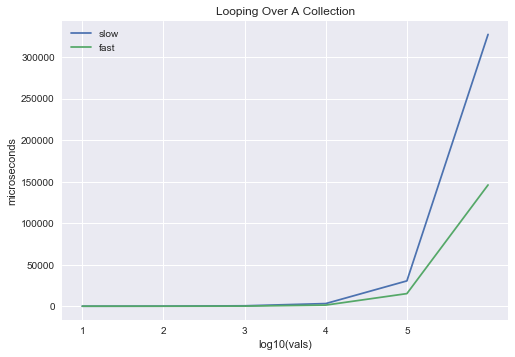

In [10]:
my_plot1(vals, sc, fc, 
        title="Looping Over A Collection", 
        xlabel="log10(vals)", 
        ylabel="microseconds")

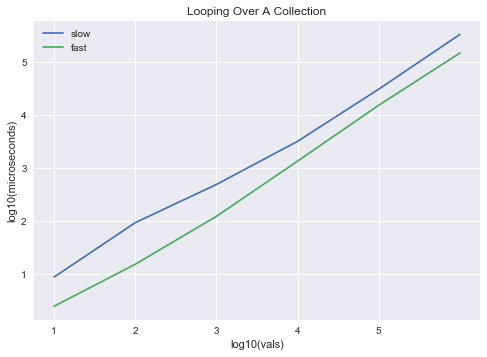

In [11]:
my_plot1(vals, np.log10(sc), np.log10(fc), 
        title="Looping Over A Collection", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

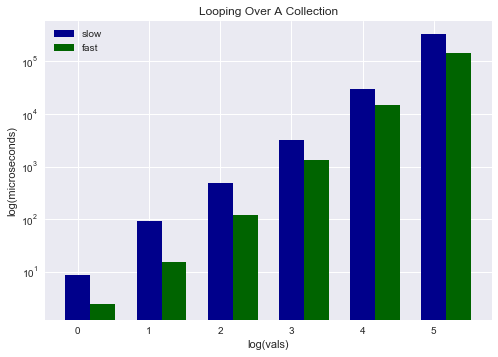

In [12]:
my_plot2(sc, fc, title="Looping Over A Collection", 
         xlabel='log(vals)', 
         ylabel="log(microseconds)")

---

# Sorting Lists

In [13]:
# LEGACY CODE

# Sorting lists
for choice in ['xrange', 'reversed']:   
    if choice is 'xrange':
        print('xrange')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in xrange(len(colors)-1, -1, -1)]     
    else:
        print('\nreversed')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in reversed(colors)]

xrange
The slowest run took 134.13 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.36 µs per loop
10000 loops, best of 3: 22.4 µs per loop
1000 loops, best of 3: 202 µs per loop
100 loops, best of 3: 2.18 ms per loop
10 loops, best of 3: 21.1 ms per loop
1 loop, best of 3: 227 ms per loop

reversed
The slowest run took 9.58 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.42 µs per loop
The slowest run took 4.47 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15.5 µs per loop
10000 loops, best of 3: 123 µs per loop
1000 loops, best of 3: 1.43 ms per loop
100 loops, best of 3: 14 ms per loop
10 loops, best of 3: 145 ms per loop


In [14]:
def slow_sort():
    out = [timeit.timeit("[colors[i] for i in range(len(colors)-1, -1, -1)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_sort():
    out = [timeit.timeit("[color for color in reversed(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [15]:
ss = slow_sort()
fs = fast_sort()

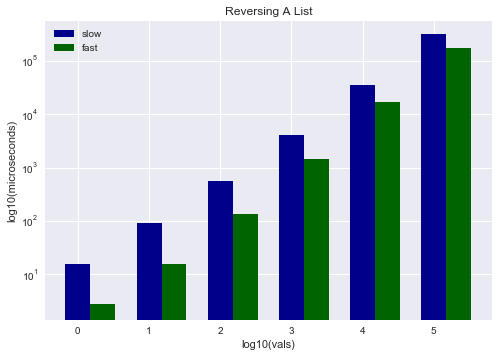

In [16]:
my_plot2(ss, fs, 
        title="Reversing A List", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

---

# Looping Over A Collection & Indices

In [17]:
# LEGACY CODE

# Looping over a collection and indices
for choice in ['xrange', 'enumerate']:   
    if choice is 'xrange':
        print('xrange')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i in xrange(len(colors))]
        
    else:
        print('\nenumerate')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i, color in enumerate(colors)]

xrange
The slowest run took 58.28 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.43 µs per loop
10000 loops, best of 3: 33.4 µs per loop
1000 loops, best of 3: 334 µs per loop
100 loops, best of 3: 4.19 ms per loop
10 loops, best of 3: 54.7 ms per loop
1 loop, best of 3: 643 ms per loop

enumerate
100000 loops, best of 3: 5.07 µs per loop
10000 loops, best of 3: 41.5 µs per loop
1000 loops, best of 3: 413 µs per loop
100 loops, best of 3: 5.05 ms per loop
10 loops, best of 3: 66.2 ms per loop
1 loop, best of 3: 652 ms per loop


In [18]:
def slow_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i in xrange(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i, color in enumerate(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [19]:
sci = slow_collection_indices()
fci = fast_collection_indices()

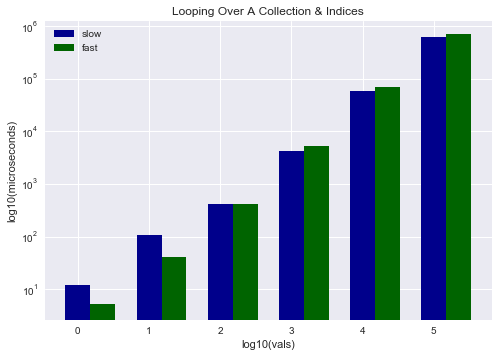

In [20]:
my_plot2(sci, fci, 
        title="Looping Over A Collection & Indices", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

---

# Looping Over Two Collections

In [21]:
# LEGACY CODE

# Loop over two collections
for choice in ['xrange', 'zip']:   
    if choice is 'xrange':
        print('xrange')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(names[i], colors[i]) for i in xrange(min(len(names), len(colors)))]
    else:
        print('\nzip')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(name, color) for name, color in zip(names, colors)]

xrange
100000 loops, best of 3: 5.27 µs per loop
10000 loops, best of 3: 41.7 µs per loop
1000 loops, best of 3: 401 µs per loop
100 loops, best of 3: 4.71 ms per loop
10 loops, best of 3: 60.1 ms per loop
1 loop, best of 3: 619 ms per loop

zip
The slowest run took 4.09 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.25 µs per loop
10000 loops, best of 3: 40.5 µs per loop
1000 loops, best of 3: 469 µs per loop
100 loops, best of 3: 5.97 ms per loop
10 loops, best of 3: 84.3 ms per loop
1 loop, best of 3: 887 ms per loop


---

# Appending Strings

In [22]:
# LEGACY CODE

# Appending Strings
my_string = ""
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('+=')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time for item in mylist: my_string += item
    else:
        print('\n.join')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time my_string = "".join([item for item in mylist])

+=
CPU times: user 93 µs, sys: 5 µs, total: 98 µs
Wall time: 114 µs
CPU times: user 1.25 ms, sys: 383 µs, total: 1.63 ms
Wall time: 1.35 ms
CPU times: user 9.63 ms, sys: 3.79 ms, total: 13.4 ms
Wall time: 10.5 ms
CPU times: user 57.5 ms, sys: 4.01 ms, total: 61.5 ms
Wall time: 59.2 ms
CPU times: user 603 ms, sys: 32.8 ms, total: 636 ms
Wall time: 619 ms
CPU times: user 5.78 s, sys: 52.4 ms, total: 5.83 s
Wall time: 5.84 s

.join
CPU times: user 36 µs, sys: 1.53 ms, total: 1.57 ms
Wall time: 1.56 ms
CPU times: user 218 µs, sys: 154 µs, total: 372 µs
Wall time: 269 µs
CPU times: user 2.2 ms, sys: 1.64 ms, total: 3.84 ms
Wall time: 2.75 ms
CPU times: user 18.1 ms, sys: 706 µs, total: 18.8 ms
Wall time: 18.8 ms
CPU times: user 199 ms, sys: 21.9 ms, total: 221 ms
Wall time: 219 ms
CPU times: user 1.97 s, sys: 159 ms, total: 2.13 s
Wall time: 2.14 s


---

# Using Standard Library

In [23]:
# Standard Library

for choice in ['listexp', 'map']:   
    if choice is 'listexp':
        print('listexp')
        for val in vals:
            %timeit [np.cumsum(item) for item in xrange(val)]
    else:
        print('\nmap')
        for val in vals:
            %timeit newlist = map(np.cumsum, xrange(val))

listexp
10000 loops, best of 3: 57.9 µs per loop
1000 loops, best of 3: 569 µs per loop
100 loops, best of 3: 5.7 ms per loop
10 loops, best of 3: 58.3 ms per loop
1 loop, best of 3: 590 ms per loop
1 loop, best of 3: 5.96 s per loop

map
10000 loops, best of 3: 57.3 µs per loop
1000 loops, best of 3: 580 µs per loop
100 loops, best of 3: 5.88 ms per loop
10 loops, best of 3: 57.3 ms per loop
1 loop, best of 3: 554 ms per loop
1 loop, best of 3: 5.57 s per loop


---

# Listexp vs Genexp

In [24]:
# listexp vs genexp

for choice in ['listexp', 'genexp']:   
    if choice is 'listexp':
        print('listexp')
        for val in vals:
            %timeit [np.cumsum(item) for item in xrange(val)] # list expression
    else:
        print('\ngenexp')
        for val in vals:
            %timeit (np.cumsum(item) for item in xrange(val)) # generator expression

listexp
10000 loops, best of 3: 58.5 µs per loop
1000 loops, best of 3: 636 µs per loop
100 loops, best of 3: 6.3 ms per loop
10 loops, best of 3: 56.8 ms per loop
1 loop, best of 3: 575 ms per loop
1 loop, best of 3: 6.01 s per loop

genexp
1000000 loops, best of 3: 575 ns per loop
The slowest run took 5.08 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 610 ns per loop
The slowest run took 10.11 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 589 ns per loop
The slowest run took 4.51 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 634 ns per loop
The slowest run took 5.07 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 611 ns per loop
The slowest run took 4.71 times longer than the fastest. This could mean th

---

# Dots

In [25]:
# Dots matter (marginally)
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        newlist = []
        for val in vals:
            %timeit newlist.append(np.cumsum(val))
    else:
        print('\nBetter')
        newlist = []
        cumsum = np.cumsum
        append = newlist.append
        for val in vals:
            %timeit append(cumsum(val))

Bad
The slowest run took 15.35 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.55 µs per loop
The slowest run took 5.07 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.35 µs per loop
The slowest run took 5.93 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.37 µs per loop
100000 loops, best of 3: 2.83 µs per loop
The slowest run took 14.23 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.31 µs per loop
The slowest run took 12.15 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.39 µs per loop

Better
The slowest run took 9.91 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 

---
**Note: Mileage will vary with Python 3. Many performance enhancements were made like converting range to a generator. See Py35 notebook for differences.**

---

## Links
[4 Performance Optimization Tips For Faster Python Code](http://blog.hackerearth.com/4-Performance-Optimization-Tips-Faster-Python-Code)  
[PythonSpeed Performance Tips](https://wiki.python.org/moin/PythonSpeed/PerformanceTips)  
[6 Python Performance Tips](https://dzone.com/articles/6-python-performance-tips)